In [2]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def usr_input():
  ticker_1 = input('Enter 1st ticker:(defalut AAPL) ') or 'AAPL'
  ticker_2 = input('Enter 2nd ticker:(defalut MSFT) ') or 'MSFT'
  return ticker_1,ticker_2

In [4]:
def get_jsonparsed_data(url):

    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [5]:
def get_dictdata(ticker,alpha,beta):

  url = ('https://financialmodelingprep.com/api/v3/income-statement/'+ticker+'?apikey=6f687ccb520121389797f851cf764bf7')
  Data = get_jsonparsed_data(url)
  eps = []
  date = []
  for element in range(len(Data)):
    eps.append(Data[element]['eps'])
    date.append(Data[element]['date'])

  ##find Y to calculate first T
  Y = eps[0:5]
  ##make X
  X = [1,2,3,4,5]
  X = sm.add_constant(X)
  ## do ols
  model = sm.OLS(Y, X)
  results = model.fit()
  _,T1 = results.params

  T = []
  S = []

  T.append(T1)
  S.append(eps[0])

  for ele in range(1,len(eps)):
   s = alpha*eps[ele]+(1-alpha)*(S[ele-1]+T[ele-1])
   t = beta*(s-S[ele-1])+(1-beta)*T[ele-1]
   T.append(t)
   S.append(s)


  dictdata = {ticker+' Date':date,ticker+' EPS':eps,ticker+' S':S,ticker+' T':T}

  return dictdata

In [7]:
test = get_dictdata('AAPL',0.3,0.2)
framedata = pd.DataFrame(test)

In [8]:
print(framedata)

     AAPL Date  AAPL EPS     AAPL S    AAPL T
0   2019-09-28     11.97  11.970000 -0.904000
1   2018-09-29     12.01  11.349200 -0.847360
2   2017-09-30      9.27  10.132288 -0.921270
3   2016-09-24      8.35   8.952712 -0.972931
4   2015-09-26      9.28   8.369847 -0.894918
5   2014-09-27      6.49   7.179450 -0.954014
6   2013-09-28     40.03  16.366805  1.074260
7   2012-09-29     44.64  25.600745  2.706196
8   2011-09-24     28.05  28.229859  2.690779
9   2010-09-25     15.41  26.267447  1.760141
10  2009-09-26      6.39  21.536312  0.461886
11  2008-09-27      5.48  17.042738 -0.529206
12  2007-09-29      4.04  12.771473 -1.277618
13  2006-09-30      1.65   8.540698 -1.868249
14  2005-09-24      1.65   5.165714 -2.169596
15  2004-09-25      0.74   2.319283 -2.304963
16  2003-09-27      0.19   0.067024 -2.294422
17  2002-09-28      0.18  -1.505179 -2.149978
18  2001-09-29     -0.11  -2.591610 -1.937269


In [41]:
sinit = framedata['AAPL EPS'][0]
tinit = framedata['AAPL T'][0]

Sfore = []
for ele in range(1,4):
  sfore = sinit + ele*tinit
  Sfore.append(sfore)
print(type(Sfore))

<class 'list'>


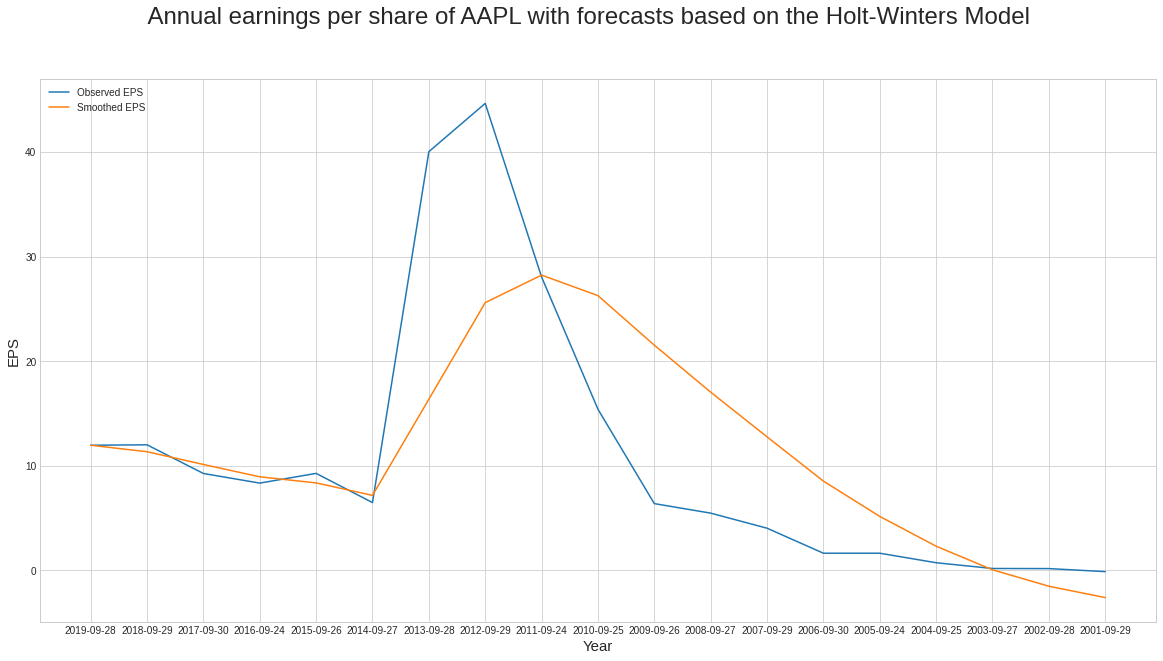

In [40]:
plt.figure(figsize=(20,10))
plt.plot(framedata['AAPL Date'], framedata['AAPL EPS'], label = "Observed EPS")
plt.plot(framedata['AAPL Date'], framedata['AAPL S'], label = "Smoothed EPS")
plt.xlabel('Year',fontsize = 15)
plt.ylabel('EPS',fontsize = 15)
plt.suptitle('   Annual earnings per share of AAPL with forecasts based on the Holt-Winters Model',fontsize = 24)
plt.legend(loc="upper left")